In [1]:
import numpy as numpy
import pandas as pandas
import json
import re
import ast

#Carregando os textos e os rótulos retornados pelo modelo no conjunto de treinamento
df = pandas.read_csv('inferencia_treinamento.csv')
df['Farmacos'] = df['Farmacos'].apply(ast.literal_eval)


In [2]:
df

,id,text,Farmacos
0,5111808920214058100,sentença 2021 - tipo cprocesso: 0511180-89.202...,[]
1,8000012220204058100,processo nº: 0800001-22.2020.4.05.8100 - proce...,[]
2,8000012220204058100,"à saúde, seja individual ou coletiva, devendo ...",[]
3,8000017920214058102,processo nº: 0800001-79.2021.4.05.8102 - proce...,"[SOLIRIS, SOLIRIS]"
4,8000017920214058102,pela requerente. em virtude da indisponibilida...,[SOLIRIS]
...,...,...,...
7229,8250024320194058100,processo nº: 0825002-43.2019.4.05.8100 - tutel...,"[NUSINERSEN, SPINRAZA, SPINRAZA, SPINRAZA]"
7230,8250024320194058100,de medicação de alto custo e possui inscrição ...,[SPINRAZA]
7231,8250024320194058100,"que, até a presente data, ainda não houve prof...",[]
7232,8250024320194058100,avanço da doença e o desenvolvimento de seus g...,"[SPINRAZA, NUSINERSEN]"


# Matching

In [3]:
num_total_farmacos = df['Farmacos'].apply(len).sum()
num_total_farmacos

9550

In [4]:
def lista_farmacos_unicos(farmacos):    
    # Inicializar um conjunto vazio para armazenar os nomes únicos
    farmacos_unic = set()

    # Iterar sobre cada lista na lista de listas
    for lista in farmacos:
        # Adicionar todos os elementos da lista atual ao conjunto de nomes únicos
        farmacos_unic.update(lista)

    # Converter o conjunto de nomes únicos de volta para uma lista (opcional)
    farmacos_unic = list(farmacos_unic)
    return farmacos_unic

farmacos_unic = lista_farmacos_unicos(df['Farmacos'])
print("Quantidade de farmacos unicos: " + str(len(farmacos_unic)))
farmacos_unic

Quantidade de farmacos unicos: 436


['IMBRUVICA',
 'MIMPARA',
 'PERJETA',
 'ESILATO DE NINTEDANIBE',
 'CRIZOTINIBE',
 'SANDOSTATIN',
 'ENZALUTAMIDA',
 'VESANOID',
 'OPTIVO',
 'DEPAKENE',
 'PANITUMUMABE',
 'PERTUZUMAB',
 'TONSILATO DE SORAFENIB',
 'VEDOTINA',
 'FABRAZYME',
 'AMPOLA',
 'ATALURENO',
 'TONSILATO DE SORAFENIBE',
 'LLPC',
 'ALFADORNASE',
 'LANEOTIDA',
 'BORTEZOMIBE',
 'PARADIGM MEDTRONIC',
 'MELENA',
 'CLORIDRATO DE METFORMINA',
 'VENVANSE',
 'INSULINA GLARGINA',
 'INLYTA',
 'ZOLADEX',
 'IPILIMUMABE',
 'ATRA',
 'GALSULFASE',
 'BUROSUMABE',
 'CLORIDRATO DE RANITIDINA',
 'LADOGAL',
 'BRENTUXIMABE VENDOTINA',
 'HEMINA',
 'BELIMUMABE',
 'ADRENALINA',
 'BORTEMOZOMIBE',
 'BLEOMICINA',
 'SANDOSTATIN LAR .',
 'THYROGEN',
 'PAZOPABINE',
 'ICATIBANTO',
 'ILOPROSTINA',
 'VIEKIRA',
 'BEVACUZIMABE',
 'TERMODAL',
 'BRENTUXIMAB VEDOTIN',
 'TAXOL',
 'VIEKIRA PAK',
 'MALATO DE SUNITINIBE',
 'BEVACIZUMBAB',
 'KEPPRA',
 'XALCORI',
 'ELTROMBOPAG',
 '5-AZACITIDINA',
 'LENVIMA',
 'AZATACIDINA',
 'TRASTUZUMA',
 'TOBROMICINA',
 'ZAVE

In [5]:
import textdistance

# Função para calcular a distância de Levenshtein entre dois elementos
def levenshtein_distance(s1, s2):
    return textdistance.levenshtein.distance(s1, s2)

# Função para encontrar pares com menor distância de Levenshtein
def encontrar_pares_menor_distancia(lista):
    menor_distancia = float('inf')
    pares_menor_distancia = []

    for i in range(len(lista)):
        for j in range(i + 1, len(lista)):
            distancia = levenshtein_distance(lista[i], lista[j])
            if distancia < menor_distancia and distancia != 0:
                menor_distancia = distancia
                pares_menor_distancia = [(lista[i], lista[j])]
            elif distancia == menor_distancia:
                pares_menor_distancia.append((lista[i], lista[j]))
    return pares_menor_distancia

resultado = encontrar_pares_menor_distancia(farmacos_unic)

In [6]:
a = 'hoje'
b = 'tome'
c = levenshtein_distance(a,b)
c

2

In [7]:
import itertools
 
def removeDuplicates(lst):
    lst.sort()
    grouped = itertools.groupby(lst)
    unique = [key for key,_ in grouped]
    return unique
 
resultado = removeDuplicates(resultado)
resultado

[('ABIRATENONA', 'ABIRATERONA'),
 ('ACETATO DE  ', 'ACETADO DE  '),
 ('ACETATO DE ABIRATERONA', 'ACETATO DE ABIRATENONA'),
 ('ACETATO DE OCTREOTIDA', 'ACETADO DE OCTREOTIDA'),
 ('AFINITOR', 'AFINATOR'),
 ('ALFAGALSIDADE', 'ALFAGALSIDASE'),
 ('ATALURENO', 'ATALUREN'),
 ('AZACITADINA', 'AZACITIDINA'),
 ('BEVACIZUMAB', 'BEVACIZUMABE'),
 ('BEVACIZUMBAB', 'BEVACIZUMAB'),
 ('BLINATUMOMAB', 'BLINATUMOMABE'),
 ('BORTEZOMIBE', 'BORTEZOMIB'),
 ('BORTEZOMIBE', 'BORTEZOMIDE'),
 ('BORTEZOMIBE', 'BOTEZOMIBE'),
 ('BRENTUXIMAB', 'BRENTUXIMABE'),
 ('BRENTUXIMAB VEDOTIN', 'BRENTUXIMAB VEDITIN'),
 ('BRENTUXIMAB VEDOTIN', 'BRENTUXIMAB VEDOTINA'),
 ('BRENTUXIMAB VEDOTIN', 'BRENTUXIMABE VEDOTIN'),
 ('BRENTUXIMABE VEDOTINA', 'BRENTUXIMAB VEDOTINA'),
 ('BRENTUXIMABE VEDOTINA', 'BRENTUXIMABE VEDOTIN'),
 ('BRENTUXIMABE VENDOTINA', 'BRENTUXIMABE VEDOTINA'),
 ('CARFILZOMIB', 'CARFILZOMIBE'),
 ('CETUXIMAB', 'CETUXIMABE'),
 ('CRIZOTINIBE', 'CRIZOTINIB'),
 ('DACOGEN', 'DACOGENR'),
 ('DEPALOTE', 'DEPAKOTE'),
 ('DEVAC

In [8]:
from collections import defaultdict

def agrupar_tuplas(tuplas):
    # Criar um dicionário para mapear cada nó ao conjunto de nós conectados a ele
    graph = defaultdict(set)
    for tupla in tuplas:
        for elemento in tupla:
            graph[elemento].update(tupla)

    # Função para encontrar todos os nós conectados a um determinado nó
    def encontrar_conectados(nodo, visitados):
        visitados.add(nodo)
        for vizinho in graph[nodo]:
            if vizinho not in visitados:
                encontrar_conectados(vizinho, visitados)

    # Encontrar grupos de elementos conectados e agrupar suas tuplas correspondentes
    grupos = []
    visitados = set()
    for nodo in graph:
        if nodo not in visitados:
            grupo = set()
            encontrar_conectados(nodo, grupo)
            novo_grupo = [tupla for tupla in tuplas if any(elem in grupo for elem in tupla)]
            if novo_grupo not in grupos:
                grupos.append(novo_grupo)

    return grupos

tuplas_combinadas = agrupar_tuplas(resultado)

In [9]:
tuplas_combinadas

[[('ABIRATENONA', 'ABIRATERONA')],
 [('ACETATO DE  ', 'ACETADO DE  ')],
 [('ACETATO DE ABIRATERONA', 'ACETATO DE ABIRATENONA')],
 [('ACETATO DE OCTREOTIDA', 'ACETADO DE OCTREOTIDA')],
 [('AFINITOR', 'AFINATOR')],
 [('ALFAGALSIDADE', 'ALFAGALSIDASE')],
 [('ATALURENO', 'ATALUREN')],
 [('AZACITADINA', 'AZACITIDINA')],
 [('BEVACIZUMAB', 'BEVACIZUMABE'),
  ('BEVACIZUMBAB', 'BEVACIZUMAB'),
  ('DEVACIZUMABE', 'BEVACIZUMABE')],
 [('BLINATUMOMAB', 'BLINATUMOMABE')],
 [('BORTEZOMIBE', 'BORTEZOMIB'),
  ('BORTEZOMIBE', 'BORTEZOMIDE'),
  ('BORTEZOMIBE', 'BOTEZOMIBE')],
 [('BRENTUXIMAB', 'BRENTUXIMABE')],
 [('BRENTUXIMAB VEDOTIN', 'BRENTUXIMAB VEDITIN'),
  ('BRENTUXIMAB VEDOTIN', 'BRENTUXIMAB VEDOTINA'),
  ('BRENTUXIMAB VEDOTIN', 'BRENTUXIMABE VEDOTIN'),
  ('BRENTUXIMABE VEDOTINA', 'BRENTUXIMAB VEDOTINA'),
  ('BRENTUXIMABE VEDOTINA', 'BRENTUXIMABE VEDOTIN'),
  ('BRENTUXIMABE VENDOTINA', 'BRENTUXIMABE VEDOTINA')],
 [('CARFILZOMIB', 'CARFILZOMIBE')],
 [('CETUXIMAB', 'CETUXIMABE')],
 [('CRIZOTINIBE', '

In [10]:
# Função para transformar a lista de listas de tuplas em uma lista única para cada lista de tuplas
def transformar_lista(lista_de_tuplas):
    lista_final = []
    for sublist in lista_de_tuplas:
        elementos_unicos = set()
        for tupla in sublist:
            elementos_unicos.update(tupla)
        lista_final.append(list(elementos_unicos))
    return lista_final

listas_combinadas = transformar_lista(tuplas_combinadas)

In [11]:
listas_combinadas

[['ABIRATERONA', 'ABIRATENONA'],
 ['ACETATO DE  ', 'ACETADO DE  '],
 ['ACETATO DE ABIRATENONA', 'ACETATO DE ABIRATERONA'],
 ['ACETADO DE OCTREOTIDA', 'ACETATO DE OCTREOTIDA'],
 ['AFINATOR', 'AFINITOR'],
 ['ALFAGALSIDASE', 'ALFAGALSIDADE'],
 ['ATALUREN', 'ATALURENO'],
 ['AZACITADINA', 'AZACITIDINA'],
 ['BEVACIZUMABE', 'BEVACIZUMBAB', 'BEVACIZUMAB', 'DEVACIZUMABE'],
 ['BLINATUMOMABE', 'BLINATUMOMAB'],
 ['BOTEZOMIBE', 'BORTEZOMIBE', 'BORTEZOMIDE', 'BORTEZOMIB'],
 ['BRENTUXIMAB', 'BRENTUXIMABE'],
 ['BRENTUXIMAB VEDOTIN',
  'BRENTUXIMAB VEDOTINA',
  'BRENTUXIMABE VENDOTINA',
  'BRENTUXIMAB VEDITIN',
  'BRENTUXIMABE VEDOTINA',
  'BRENTUXIMABE VEDOTIN'],
 ['CARFILZOMIBE', 'CARFILZOMIB'],
 ['CETUXIMAB', 'CETUXIMABE'],
 ['CRIZOTINIBE', 'CRIZOTINIB'],
 ['DACOGEN', 'DACOGENR'],
 ['DEPALOTE', 'DEPAKOTE'],
 ['DICLORIDRATO DE SAPROPTERINA', 'DICLORIDATO DE SAPROPTERINA'],
 ['ELTROMBOPLAG', 'ELTROMBOPAG'],
 ['ESILATO DE NINTEDANIBE', 'ESTILATO DE NINTEDANIBE'],
 ['FORTÉO', 'FORTEO', 'FÓRTEO'],
 ['GEF

# DE-PARA com tabela da anvisa

In [12]:
anvisa = pandas.read_csv('ANVISA.csv', sep=';')
anvisa = anvisa[['nome_comercial','principio_ativo']]
anvisa

,nome_comercial,principio_ativo
0,BAYCUTEN N,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL
1,ORENCIA,ABATACEPTE
2,ORENCIA,ABATACEPTE
3,ORENCIA,ABATACEPTE
4,REOPRO,ABCIXIMABE
...,...,...
29313,SIMECO PLUS,ÓXIDO DE MAGNÉSIO;SIMETICONA;HIDRÓXIDO DE ALUM...
29314,VITAGLÓS,ÓXIDO DE ZINCO
29315,VITAGLÓS,ÓXIDO DE ZINCO
29316,PRATIGLÓS,ÓXIDO DE ZINCO;RETINOL;COLECALCIFEROL


In [13]:
anvisa = anvisa.drop_duplicates(subset=['nome_comercial','principio_ativo'])
anvisa

,nome_comercial,principio_ativo
0,BAYCUTEN N,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL
1,ORENCIA,ABATACEPTE
4,REOPRO,ABCIXIMABE
6,VERZENIOS,ABEMACICLIBE
14,CIBINQO,ABROCITINIBE
...,...,...
29312,ACCUVIT,ÓXIDO CÚPRICO;SELENATO DE SÓDIO;ACETATO DE RAC...
29313,SIMECO PLUS,ÓXIDO DE MAGNÉSIO;SIMETICONA;HIDRÓXIDO DE ALUM...
29314,VITAGLÓS,ÓXIDO DE ZINCO
29316,PRATIGLÓS,ÓXIDO DE ZINCO;RETINOL;COLECALCIFEROL


In [14]:
df_sunitinibe = anvisa[anvisa['principio_ativo'].str.contains('SUNITINIBE', case=False, na=False)]


In [15]:
df_sunitinibe

,nome_comercial,principio_ativo
19639,SUTENT,MALATO DE SUNITINIBE
19642,SUZOPA,MALATO DE SUNITINIBE


In [16]:
# Achatar a lista de listas em uma única lista
all_farmacos = [item for sublist in df['Farmacos'] for item in sublist]

# Combinar os valores únicos das colunas 'principio_ativo' e 'nome_comercial'
principios_comercial_unicos = pandas.concat([anvisa['principio_ativo'], anvisa['nome_comercial']]).unique()

# Encontrar os fármacos que não estão nem nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes = [farmaco for farmaco in all_farmacos if farmaco not in principios_comercial_unicos]

# Obter a lista de fármacos únicos que não estão nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes_unicos = list(set(farmacos_nao_presentes))

print("Quantidade de nomes que não estão na tabela da anvisa: " + str(len(farmacos_nao_presentes)))
print("Quantidade de nomes únicos não estão na tabela da anvisa " + str(len(farmacos_nao_presentes_unicos)))

Quantidade de nomes que não estão na tabela da anvisa: 1603
Quantidade de nomes únicos não estão na tabela da anvisa 209


In [17]:
farmacos_nao_presentes_unicos

['ISODIOLEX',
 'FLUOROURACIL',
 'BLINATUMOMAB',
 'TERIPATIDA',
 'JAVAKI',
 'CETUXIMAB',
 'CYSTAGON',
 'ACETADO DE  ',
 'SANDOSTATIN-LAR',
 'SUNITINIB',
 'ENTEROFIX',
 'BEVACIZUMAB',
 'LEVANTINIB',
 'PAZOPANIB',
 'ELTROMBOPLAG',
 'AUMENTA',
 'ELTROBOMPAG',
 'ZITIGA',
 'NUTRISON',
 'PARÓTIDA',
 'FORTÉO',
 'ATALUREN',
 'OPTIVO',
 'BIFOSFONATO',
 'LANREOTIDA',
 'INTERFERON ALFA',
 'DARATUMABE',
 'DITOSILATO DE',
 'SOMATULINE',
 'SORAFENIB',
 'INTERFERON',
 'ROMIPLISTIN',
 'PREVENT',
 'SUSTENT',
 'RITUXIMAB',
 'PERTUZUMAB',
 'TONSILATO DE SORAFENIB',
 'NVOLUMABE',
 'ACETADO DE OCTREOTIDA',
 'MABTERA',
 'SANDOSTIN',
 'VEDOTINA',
 'VALCADE',
 'AMPOLA',
 'SANDOSTATIN LAR  ',
 'TONSILATO DE SORAFENIBE',
 'LLPC',
 'APLV',
 'LANEOTIDA',
 'RILUTEK',
 'CLORAFABINA',
 'AZACITADINA',
 'VIDASA',
 'PARADIGM MEDTRONIC',
 'MELENA',
 'USTEQUUINUMABE',
 'TEMOZOLAMINA',
 'PRAMIPEXOLE',
 'JEVITANA',
 'OMBITASVIR',
 'BRENTUXIMABE',
 'EVEROLIMUS',
 'ATRA',
 'SORAFENIBE',
 'CLORIDRATO DE  ',
 'INOTERSEN',
 'PAZ

# Gerando dicionário para mapear o nome comercial correto com os nomes encontrados nos documentos

In [18]:
# Função para encontrar o nome correto mais próximo baseado na distância de Levenshtein
def encontrar_nome_mais_proximo(nome_errado, nomes_corretos):
    menor_distancia = float('inf')
    nome_mais_proximo = None
    
    for nome_correto in nomes_corretos:
        dist = levenshtein_distance(nome_errado, nome_correto)
        if dist < menor_distancia:
            menor_distancia = dist
            nome_mais_proximo = nome_correto
            
    return nome_mais_proximo

# Dicionário para armazenar os resultados
mapping_nome_comercial = {}

# Primeiro, encontre todos os nomes corretos em listas combinadas
for lista in listas_combinadas:
    for nome in lista:
        if nome in anvisa['nome_comercial'].tolist():
            if nome not in mapping_nome_comercial:
                mapping_nome_comercial[nome] = []

# Em seguida, associe os nomes incorretos ao nome correto mais próximo
for lista in listas_combinadas:
    nomes_corretos = [nome for nome in lista if nome in anvisa['nome_comercial'].tolist()]
    nomes_errados = [nome for nome in lista if nome not in anvisa['nome_comercial'].tolist()]
    
    for nome_errado in nomes_errados:
        nome_mais_proximo = encontrar_nome_mais_proximo(nome_errado, nomes_corretos)
        if nome_mais_proximo:
            mapping_nome_comercial[nome_mais_proximo].append(nome_errado)

# Dicionário para armazenar os resultados dos princípios ativos
mapping_principio_ativo = {}

# Primeiro, encontre todos os princípios ativos corretos em listas combinadas
for lista in listas_combinadas:
    for nome in lista:
        if nome in anvisa['principio_ativo'].tolist():
            if nome not in mapping_principio_ativo:
                mapping_principio_ativo[nome] = []

# Em seguida, associe os nomes incorretos ao princípio ativo correto mais próximo
for lista in listas_combinadas:
    nomes_corretos = [nome for nome in lista if nome in anvisa['principio_ativo'].tolist()]
    nomes_errados = [nome for nome in lista if nome not in anvisa['principio_ativo'].tolist()]
    
    for nome_errado in nomes_errados:
        nome_mais_proximo = encontrar_nome_mais_proximo(nome_errado, nomes_corretos)
        if nome_mais_proximo:
            mapping_principio_ativo[nome_mais_proximo].append(nome_errado)

mapping_farmacos = mapping_nome_comercial | mapping_principio_ativo
mapping_farmacos

{'ACETATO DE ABIRATERONA': ['ACETATO DE ABIRATENONA'],
 'AFINITOR': ['AFINATOR'],
 'AZACITIDINA': ['AZACITADINA'],
 'BORTEZOMIBE': ['BOTEZOMIBE', 'BORTEZOMIDE', 'BORTEZOMIB'],
 'DACOGEN': ['DACOGENR'],
 'DEPAKOTE': ['DEPALOTE'],
 'ESILATO DE NINTEDANIBE': ['ESTILATO DE NINTEDANIBE'],
 'FORTEO': ['FORTÉO', 'FÓRTEO'],
 'GEFITINIBE': [],
 'JEVTANA': ['JEVITANA'],
 'MABTHERA': ['MABTERA'],
 'NPLATE': ['N-PLATE'],
 'OCREVUS': ['OCREVUZ'],
 'OPDIVO': ['OPTIVO'],
 'REVLIMID': ['REVLIMD'],
 'SANDOSTATIN': ['SADOSTATIN'],
 'STELARA': ['STELAR'],
 'SUTENT': ['SUSTENT', 'SUSTEN'],
 'TECENTRIQ': ['TECENTNRIQ'],
 'TEMOZOLOMIDA': ['TEMOZOLAMIDA', 'TEMOZOLAMINA'],
 'TEMODAL': ['TERMODAL'],
 'VELCADE': ['VALCADE'],
 'VIDAZA': ['VIDASA'],
 'VOTRIENT': ['VOTRIENTE'],
 'XALKORI': ['XALCORI'],
 'ZYTIGA': ['ZITIGA', 'ZYTYGA'],
 'ACETATO DE OCTREOTIDA': ['ACETADO DE OCTREOTIDA'],
 'ALFAGALSIDASE': ['ALFAGALSIDADE'],
 'ATALURENO': ['ATALUREN'],
 'BEVACIZUMABE': ['BEVACIZUMBAB', 'BEVACIZUMAB', 'DEVACIZUMABE']

O código a seguir é utilizado para remover os farmacos que possuem uma letra de diferença e estão na lista da anvisa, indicando que não há erro de digitação

In [19]:
# Invertendo o dicionário para ter listas como chaves e chaves originais como valores
inverted_dict = {}
for chave, valores in mapping_farmacos.items():
    valores_tupla = tuple(valores)
    if valores_tupla not in inverted_dict:
        inverted_dict[valores_tupla] = [chave]
    else:
        inverted_dict[valores_tupla].append(chave)

# Removendo listas duplicadas
for valores, chaves in inverted_dict.items():
    if len(chaves) > 1:
        for chave in chaves[1:]:
            del mapping_farmacos[chave]

In [20]:
dicionario_correcao = {}

for chave, valores in mapping_farmacos.items():
    for valor in valores:
        if valor != chave:
            dicionario_correcao[valor] = chave

dicionario_correcao

{'ACETATO DE ABIRATENONA': 'ACETATO DE ABIRATERONA',
 'AFINATOR': 'AFINITOR',
 'AZACITADINA': 'AZACITIDINA',
 'BOTEZOMIBE': 'BORTEZOMIBE',
 'BORTEZOMIDE': 'BORTEZOMIBE',
 'BORTEZOMIB': 'BORTEZOMIBE',
 'DACOGENR': 'DACOGEN',
 'DEPALOTE': 'DEPAKOTE',
 'ESTILATO DE NINTEDANIBE': 'ESILATO DE NINTEDANIBE',
 'FORTÉO': 'FORTEO',
 'FÓRTEO': 'FORTEO',
 'JEVITANA': 'JEVTANA',
 'MABTERA': 'MABTHERA',
 'N-PLATE': 'NPLATE',
 'OCREVUZ': 'OCREVUS',
 'OPTIVO': 'OPDIVO',
 'REVLIMD': 'REVLIMID',
 'SADOSTATIN': 'SANDOSTATIN',
 'STELAR': 'STELARA',
 'SUSTENT': 'SUTENT',
 'SUSTEN': 'SUTENT',
 'TECENTNRIQ': 'TECENTRIQ',
 'TEMOZOLAMIDA': 'TEMOZOLOMIDA',
 'TEMOZOLAMINA': 'TEMOZOLOMIDA',
 'TERMODAL': 'TEMODAL',
 'VALCADE': 'VELCADE',
 'VIDASA': 'VIDAZA',
 'VOTRIENTE': 'VOTRIENT',
 'XALCORI': 'XALKORI',
 'ZITIGA': 'ZYTIGA',
 'ZYTYGA': 'ZYTIGA',
 'ACETADO DE OCTREOTIDA': 'ACETATO DE OCTREOTIDA',
 'ALFAGALSIDADE': 'ALFAGALSIDASE',
 'ATALUREN': 'ATALURENO',
 'BEVACIZUMBAB': 'BEVACIZUMABE',
 'BEVACIZUMAB': 'BEVACIZ

# Corrigindo o rótulo do dataset

In [21]:
# Função para corrigir nomes de medicamentos conforme o dicionário
def corrigir_medicamentos(lista_medicamentos):
    lista_corrigida = lista_medicamentos.copy()  # Cria uma cópia dos dados da lista
    for i, medicamento in enumerate(lista_corrigida):
        if medicamento in dicionario_correcao:
            lista_corrigida[i] = dicionario_correcao[medicamento]
    return lista_corrigida

# Aplicando a função à coluna de medicamentos do DataFrame

df['farmacos_corrigidos'] = df['Farmacos']
df['farmacos_corrigidos'] = df['farmacos_corrigidos'].apply(corrigir_medicamentos)


In [22]:
num_total_farmacos_corrigidos = df['farmacos_corrigidos'].apply(len).sum()
print("Quantidade de farmacos final: " + str(num_total_farmacos_corrigidos))

Quantidade de farmacos final: 9550


In [23]:
farmacos_unic = lista_farmacos_unicos(df['farmacos_corrigidos'])
#Remove os rótulos vazios
print("Quantidade de nomes unicos: " + str(len(farmacos_unic)))
# Percebe-se que a quantidade de nomes únicos diminuiu de 185 para 172

Quantidade de nomes unicos: 370


In [24]:
# Achatar a lista de listas em uma única lista
all_farmacos = [item for sublist in df['farmacos_corrigidos'] for item in sublist]

# Combinar os valores únicos das colunas 'principio_ativo' e 'nome_comercial'
principios_comercial_unicos = pandas.concat([anvisa['principio_ativo'], anvisa['nome_comercial']]).unique()

# Encontrar os fármacos que não estão nem nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes = [farmaco for farmaco in all_farmacos if farmaco not in principios_comercial_unicos]

# Obter a lista de fármacos únicos que não estão nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes_unicos = list(set(farmacos_nao_presentes))

print("Quantidade de nomes que não estão na tabela da anvisa: " + str(len(farmacos_nao_presentes)))
print("Quantidade de nomes únicos não estão na tabela da anvisa " + str(len(farmacos_nao_presentes_unicos)))

Quantidade de nomes que não estão na tabela da anvisa: 1085
Quantidade de nomes únicos não estão na tabela da anvisa 143


In [25]:
farmacos_nao_presentes_unicos

['ISODIOLEX',
 'FLUOROURACIL',
 'TERIPATIDA',
 'JAVAKI',
 'CYSTAGON',
 'ACETADO DE  ',
 'SANDOSTATIN-LAR',
 'SUNITINIB',
 'ENTEROFIX',
 'LEVANTINIB',
 'PAZOPANIB',
 'ELTROMBOPLAG',
 'AUMENTA',
 'ELTROBOMPAG',
 'NUTRISON',
 'PARÓTIDA',
 'BIFOSFONATO',
 'LANREOTIDA',
 'INTERFERON ALFA',
 'DARATUMABE',
 'DITOSILATO DE',
 'SOMATULINE',
 'SORAFENIB',
 'INTERFERON',
 'ROMIPLISTIN',
 'PREVENT',
 'TONSILATO DE SORAFENIB',
 'SANDOSTIN',
 'VEDOTINA',
 'AMPOLA',
 'SANDOSTATIN LAR  ',
 'TONSILATO DE SORAFENIBE',
 'LLPC',
 'APLV',
 'LANEOTIDA',
 'RILUTEK',
 'CLORAFABINA',
 'PARADIGM MEDTRONIC',
 'MELENA',
 'PRAMIPEXOLE',
 'OMBITASVIR',
 'BRENTUXIMABE',
 'EVEROLIMUS',
 'ATRA',
 'SORAFENIBE',
 'CLORIDRATO DE  ',
 'INOTERSEN',
 'PAZOPANIBE',
 'CONTENT',
 'ACETATO ABIRATERONA',
 'SYNACTHEN',
 'GENITOR',
 'VANDETINIBE',
 'LEVA',
 'TRASTUZUMABE-ENTANSINA',
 'ADRENALINA',
 'BORTEMOZOMIBE',
 'LAPATINIBE',
 'BLEOMICINA',
 'MALEATO DE  ',
 'SANDOSTATIN LAR .',
 'PAZOPABINE',
 'ICATIBANTO',
 'ILOPROSTINA',
 '

# Substituição do nome comercial por princípio ativo utilizando tabela da anvisa

In [26]:
dicionario_nome_comercial = anvisa.set_index('nome_comercial')['principio_ativo'].to_dict()

def count_nome_comercial(df):
    nome_comercial = []
    nome_comercial_nao_encontrado = []
    for index,row in df.iterrows():
        for farmaco in row['farmacos_corrigidos']:
            if farmaco in dicionario_nome_comercial:
                nome_comercial.append(farmaco)
            else:
                nome_comercial_nao_encontrado.append(farmaco)
    return nome_comercial,nome_comercial_nao_encontrado

nomes_comerciais, nome_comercial_nao_encontrado = count_nome_comercial(df)
print("Quantidade de nomes encontrados na lista de comerciais da anvisa: "+ str(len(nomes_comerciais)))
print("Quantidade de nomes não encontrados na lista de comerciais da anvisa: "+ str(len(nome_comercial_nao_encontrado)))


Quantidade de nomes encontrados na lista de comerciais da anvisa: 6994
Quantidade de nomes não encontrados na lista de comerciais da anvisa: 2556


In [27]:
dicionario_nome_comercial

{'BAYCUTEN N': '21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL',
 'ORENCIA': 'ABATACEPTE',
 'REOPRO': 'ABCIXIMABE',
 'VERZENIOS': 'ABEMACICLIBE',
 'CIBINQO': 'ABROCITINIBE',
 'CALQUENCE': 'ACALABRUTINIBE',
 'AGLUCOSE': 'ACARBOSE',
 'GLUCOBAY': 'ACARBOSE',
 'ACEBROFILINA': 'ACEBROFILINA',
 'FILINAR G': 'ACEBROFILINA',
 'FILINAR': 'ACEBROFILINA',
 'DILABRONCO': 'ACEBROFILINA',
 'LISOMUC': 'ACEBROFILINA',
 'RESPIRAN': 'ACEBROFILINA',
 'MELYSSE': 'ACEBROFILINA',
 'BRONDILAT': 'ACEBROFILINA',
 'BRONTEK': 'ACEBROFILINA',
 'BRONDYNEO': 'ACEBROFILINA',
 'BRONCOLEX': 'ACEBROFILINA',
 'DISMUCAL': 'ACEBROFILINA',
 'PROFLAM': 'ACECLOFENACO',
 'ACECLOFENACO': 'ACECLOFENACO',
 'FEBUPEN': 'ACECLOFENACO',
 'CECOFLAN': 'ACECLOFENACO',
 'ACEFLOR': 'ACECLOFENACO',
 'ACECLO-GRAN': 'ACECLOFENACO',
 'ADVANTAN': 'ACEPONATO DE METILPREDNISOLONA',
 'ZOSTIDE': 'ACETATO DE ABIRATERONA',
 'MATIZ': 'ACETATO DE ABIRATERONA',
 'ACETATO DE ABIRATERONA': 'ACETATO DE ABIRATERONA',
 'ABMETHA': 'ACETATO DE ABIRATERONA',
 'ZYTIGA

In [28]:
def nomes_unicos(farmacos):    
    # Inicializar um conjunto vazio para armazenar os nomes únicos
    farmacos_unic = set(farmacos)

    # Converter o conjunto de nomes únicos de volta para uma lista (opcional)
    farmacos_unic = list(farmacos_unic)
    return farmacos_unic

nomes_comerciais_unic = nomes_unicos(nomes_comerciais)
nome_comercial_nao_encontrado_unic = nomes_unicos(nome_comercial_nao_encontrado)
#Remove os rótulos vazios
print("Quantidade de nomes únicos encontrados na lista de nomes comerciais da tabela da anvisa: " + str(len(nomes_comerciais_unic)))
print("Quantidade de nomes únicos não encontrados na lista de nomes comerciais da tabela da anvisa: " + str(len(nome_comercial_nao_encontrado_unic)))


Quantidade de nomes únicos encontrados na lista de nomes comerciais da tabela da anvisa: 163
Quantidade de nomes únicos não encontrados na lista de nomes comerciais da tabela da anvisa: 207


In [29]:
nomes_comerciais_unic

['KISQALI',
 'IMBRUVICA',
 'TEMODAL',
 'FIRAZYR',
 'AFINITOR',
 'DOXOPEG',
 'MIMPARA',
 'EPREX',
 'MYOZYME',
 'LIORAM',
 'PERJETA',
 'ESILATO DE NINTEDANIBE',
 'PEMETREXEDE',
 'XGEVA',
 'PREBICTAL',
 'SANDOSTATIN',
 'TEGSEDI',
 'GLIFAGE XR',
 'VESANOID',
 'CAPECITABINA',
 'NAPROXENO',
 'DEPAKENE',
 'REVOLADE',
 'NAGLAZYME',
 'MIDAZOLAM',
 'CLORIDRATO DE BENDAMUSTINA',
 'AGRYLIN',
 'DUPIXENT',
 'SOFOSBUVIR',
 'GEFITINIBE',
 'FABRAZYME',
 'OPDIVO',
 'HUMIRA',
 'VENCLEXTA',
 'LYNPARZA',
 'MOZOBIL',
 'CABAZITAXEL',
 'JEVTANA',
 'VELCADE',
 'FORTEO',
 'BORTEZOMIBE',
 'TYSABRI',
 'ERIVEDGE',
 'OCREVUS',
 'CLORIDRATO DE CINACALCETE',
 'ACETATO DE ABIRATERONA',
 'ENTYVIO',
 'IRESSA',
 'FAMPYRA',
 'CLORIDRATO DE METFORMINA',
 'VENVANSE',
 'VIMIZIM',
 'INLYTA',
 'ZOLADEX',
 'LOSEC',
 'ADCETRIS',
 'CLORIDRATO DE RANITIDINA',
 'ILARIS',
 'AXONIUM',
 'UPELIOR',
 'LADOGAL',
 'YERVOY',
 'SOLIRIS',
 'DOCETAXEL',
 'AZITROMICINA',
 'CLORIDRATO DE PROPRANOLOL',
 'BLINCYTO',
 'THYROGEN',
 'ALDURAZYME',
 '

In [30]:
dicionario_nome_comercial = anvisa.set_index('nome_comercial')['principio_ativo'].to_dict()

# Função para substituir os nomes comerciais por principios ativos na coluna de fármacos
def corrigir_farmacos(row):
    farmacos_corrigidos = []
    for farmaco in row['farmacos_corrigidos']:
        if farmaco in dicionario_nome_comercial:
            farmacos_corrigidos.append(dicionario_nome_comercial[farmaco])
        else:
            farmacos_corrigidos.append(farmaco)
    return farmacos_corrigidos

# Aplicando a correção no DataFrame de texto e fármacos
df['farmacos_final'] = df.apply(corrigir_farmacos, axis=1)


# Estudando o problema de quando o nome_comercial e principio_ativo são iguais

In [31]:
# Filtrar as linhas onde 'nome_comercial' é igual a 'principio_ativo'
equal_rows = anvisa[anvisa['nome_comercial'] == anvisa['principio_ativo']]
# Obter os nomes únicos
unique_names = equal_rows['nome_comercial'].unique()
# Converter a lista de nomes únicos em uma lista Python
unique_names_list = unique_names.tolist()
print("Quantidade de nomes que se repetem na mesma linha (nome_comercial = principio_ativo): " + str(len(unique_names_list)))

Quantidade de nomes que se repetem na mesma linha (nome_comercial = principio_ativo): 496


In [32]:
def count_nome_comercial_2(df):
    nome_comercial = []
    nome_comercial_nao_encontrado = []
    comercial_igual_ativo = []
    for index,row in df.iterrows():
        for farmaco in row['farmacos_final']:
            if farmaco in dicionario_nome_comercial:
                nome_comercial.append(farmaco)
                if farmaco in unique_names_list:
                    comercial_igual_ativo.append(farmaco)
            else:
                nome_comercial_nao_encontrado.append(farmaco)
    return nome_comercial,nome_comercial_nao_encontrado, comercial_igual_ativo

nomes_comerciais, nome_comercial_nao_encontrado, comercial_igual_ativo= count_nome_comercial_2(df)
print("Quantidade de nomes encontrados na lista de nomes comerciais da anvisa: "+ str(len(nomes_comerciais)))
print("Quantidade de nomes não encontrados na lista de nomes comerciais da anvisa: "+ str(len(nome_comercial_nao_encontrado)))

nomes_comerciais_unic = nomes_unicos(nomes_comerciais)
nome_comercial_nao_encontrado_unic = nomes_unicos(nome_comercial_nao_encontrado)
comercial_igual_ativo_unic = nomes_unicos(comercial_igual_ativo)
#Remove os rótulos vazios
print("Quantidade de nomes únicos encontrados na lista de nomes comerciais da tabela da anvisa: " + str(len(nomes_comerciais_unic)))
print("Quantidade de nomes únicos não encontrados na lista de nomes comerciais da tabela da anvisa: " + str(len(nome_comercial_nao_encontrado_unic)))
print("Quantidade de nomes que são nome comercial e principio ativo ao mesmo tempo: " + str(len(comercial_igual_ativo_unic)))

Quantidade de nomes encontrados na lista de nomes comerciais da anvisa: 2778
Quantidade de nomes não encontrados na lista de nomes comerciais da anvisa: 6772
Quantidade de nomes únicos encontrados na lista de nomes comerciais da tabela da anvisa: 46
Quantidade de nomes únicos não encontrados na lista de nomes comerciais da tabela da anvisa: 250
Quantidade de nomes que são nome comercial e principio ativo ao mesmo tempo: 46


In [33]:
anvisa

,nome_comercial,principio_ativo
0,BAYCUTEN N,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL
1,ORENCIA,ABATACEPTE
4,REOPRO,ABCIXIMABE
6,VERZENIOS,ABEMACICLIBE
14,CIBINQO,ABROCITINIBE
...,...,...
29312,ACCUVIT,ÓXIDO CÚPRICO;SELENATO DE SÓDIO;ACETATO DE RAC...
29313,SIMECO PLUS,ÓXIDO DE MAGNÉSIO;SIMETICONA;HIDRÓXIDO DE ALUM...
29314,VITAGLÓS,ÓXIDO DE ZINCO
29316,PRATIGLÓS,ÓXIDO DE ZINCO;RETINOL;COLECALCIFEROL


In [34]:
num_total_farmacos_final = df['farmacos_final'].apply(len).sum()
farmacos_unic = lista_farmacos_unicos(df['farmacos_final'])
#Remove os rótulos vazios
print("Quantidade de farmacos final: " + str(num_total_farmacos_final))
print("Quantidade de nomes únicos final: " + str(len(farmacos_unic)))

Quantidade de farmacos final: 9550
Quantidade de nomes únicos final: 296


In [35]:
# Achatar a lista de listas em uma única lista
all_farmacos = [item for sublist in df['farmacos_final'] for item in sublist]

# Combinar os valores únicos das colunas 'principio_ativo' e 'nome_comercial'
principios_comercial_unicos = pandas.concat([anvisa['principio_ativo'], anvisa['nome_comercial']]).unique()

# Encontrar os fármacos que não estão nem nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes = [farmaco for farmaco in all_farmacos if farmaco not in principios_comercial_unicos]

# Obter a lista de fármacos únicos que não estão nos princípios ativos nem nos nomes comerciais
farmacos_nao_presentes_unicos = list(set(farmacos_nao_presentes))

print("Quantidade de nomes que não estão na tabela da anvisa: " + str(len(farmacos_nao_presentes)))
print("Quantidade de nomes únicos não estão na tabela da anvisa " + str(len(farmacos_nao_presentes_unicos)))

Quantidade de nomes que não estão na tabela da anvisa: 1085
Quantidade de nomes únicos não estão na tabela da anvisa 143


In [36]:
df

,id,text,Farmacos,farmacos_corrigidos,farmacos_final
0,5111808920214058100,sentença 2021 - tipo cprocesso: 0511180-89.202...,[],[],[]
1,8000012220204058100,processo nº: 0800001-22.2020.4.05.8100 - proce...,[],[],[]
2,8000012220204058100,"à saúde, seja individual ou coletiva, devendo ...",[],[],[]
3,8000017920214058102,processo nº: 0800001-79.2021.4.05.8102 - proce...,"[SOLIRIS, SOLIRIS]","[SOLIRIS, SOLIRIS]","[ECULIZUMABE, ECULIZUMABE]"
4,8000017920214058102,pela requerente. em virtude da indisponibilida...,[SOLIRIS],[SOLIRIS],[ECULIZUMABE]
...,...,...,...,...,...
7229,8250024320194058100,processo nº: 0825002-43.2019.4.05.8100 - tutel...,"[NUSINERSEN, SPINRAZA, SPINRAZA, SPINRAZA]","[NUSINERSENA, SPINRAZA, SPINRAZA, SPINRAZA]","[NUSINERSENA, NUSINERSENA, NUSINERSENA, NUSINE..."
7230,8250024320194058100,de medicação de alto custo e possui inscrição ...,[SPINRAZA],[SPINRAZA],[NUSINERSENA]
7231,8250024320194058100,"que, até a presente data, ainda não houve prof...",[],[],[]
7232,8250024320194058100,avanço da doença e o desenvolvimento de seus g...,"[SPINRAZA, NUSINERSEN]","[SPINRAZA, NUSINERSENA]","[NUSINERSENA, NUSINERSENA]"


In [37]:
def contar_diferencas(row):
    farmacos_originais = row['Farmacos']
    farmacos_corrigidos = row['farmacos_corrigidos']
    # Contar diferenças
    diferencas = sum(1 for orig, corr in zip(farmacos_originais, farmacos_corrigidos) if orig != corr)
    return diferencas

df['diferencas_1'] = df.apply(contar_diferencas, axis=1)

total_diferencas = df['diferencas_1'].sum()
total_diferencas

518

In [38]:
def contar_diferencas_2(row):
    farmacos_originais = row['farmacos_corrigidos']
    farmacos_corrigidos = row['farmacos_final']
    # Contar diferenças
    diferencas = sum(1 for orig, corr in zip(farmacos_originais, farmacos_corrigidos) if orig != corr)
    return diferencas

df['diferencas_2'] = df.apply(contar_diferencas_2, axis=1)

total_diferencas_2 = df['diferencas_2'].sum()
total_diferencas_2

6375

In [39]:
def contar_diferencas_3(row):
    farmacos_originais = row['Farmacos']
    farmacos_corrigidos = row['farmacos_final']
    # Contar diferenças
    diferencas = sum(1 for orig, corr in zip(farmacos_originais, farmacos_corrigidos) if orig != corr)
    return diferencas

df['diferencas_3'] = df.apply(contar_diferencas_3, axis=1)

total_diferencas_2 = df['diferencas_3'].sum()
total_diferencas_2

6810

# Resultados

O dataset conta com 185 nomes distintos de fármacos, totalizando 722 fármacos reconhecidos.

Após fazer a correção ortográfica, o número de fármacos distintos foram reduzidos para 172.

Após mapear os nomes comerciais para os princípios ativos, restaram 140 rótulos distintos.

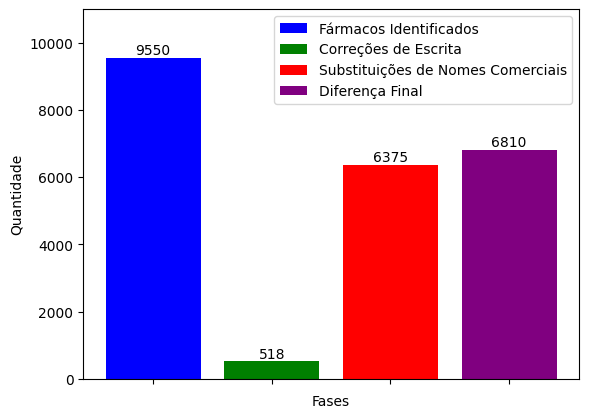

In [40]:
import matplotlib.pyplot as plt

# Dados
categorias = ['Fármacos Identificados', 'Correções de Escrita', 'Substituições de Nomes Comerciais', 'Diferença Final']
valores = [9550, 518, 6375, 6810]

# Cores diferentes para cada barra
cores = ['blue', 'green', 'red', 'purple']

# Criar o gráfico de barras
bars = plt.bar(range(len(categorias)), valores, color=cores)

# Adicionar título e rótulos aos eixos
plt.xlabel('Fases')
plt.ylabel('Quantidade')

# Ajustar o limite do eixo y
plt.ylim(0, 11000)

# Adicionar legenda
for bar, categoria in zip(bars, categorias):
    bar.set_label(categoria)
plt.legend()

# Adicionar valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Remover rótulos do eixo x
plt.xticks(range(len(categorias)), ['']*len(categorias))

# Mostrar o gráfico
plt.show()


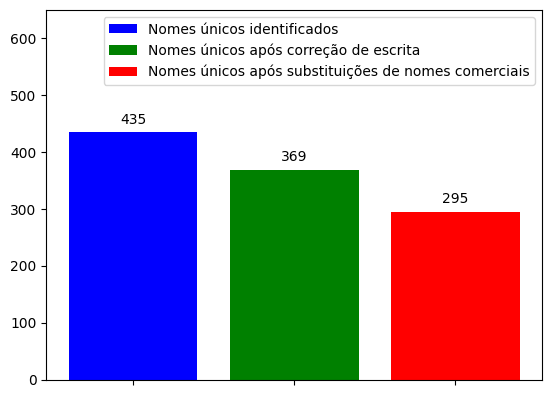

In [41]:
import matplotlib.pyplot as plt

# Dados
categorias = ['Nomes únicos identificados', 'Nomes únicos após correção de escrita', 'Nomes únicos após substituições de nomes comerciais']
valores = [435, 369, 295]

# Cores diferentes para cada barra
cores = ['blue', 'green', 'red']

# Criar o gráfico de barras
bars = plt.bar(range(len(categorias)), valores, color=cores)

# # Adicionar título e rótulos aos eixos
# plt.xlabel('Fases')
# plt.ylabel('Quantidade')

# Ajustar o limite do eixo y
plt.ylim(0, 650)

# Adicionar legenda
for bar, categoria in zip(bars, categorias):
    bar.set_label(categoria)
plt.legend()

# Adicionar valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom')

# Remover rótulos do eixo x
plt.xticks(range(len(categorias)), ['']*len(categorias))

# Mostrar o gráfico
plt.show()

In [42]:
#Gerando o dataset para a análise no qliksense
df_qlik = df[['id','farmacos_final']].explode('farmacos_final')
df_qlik = df_qlik[df_qlik['farmacos_final'].notna()]

In [43]:
df_qlik

,id,farmacos_final
3,8000017920214058102,ECULIZUMABE
3,8000017920214058102,ECULIZUMABE
4,8000017920214058102,ECULIZUMABE
5,8000017920214058102,ECULIZUMABE
6,8000017920214058102,ECULIZUMABE
...,...,...
7232,8250024320194058100,NUSINERSENA
7232,8250024320194058100,NUSINERSENA
7233,8250024320194058100,NUSINERSENA
7233,8250024320194058100,NUSINERSENA


In [44]:
df_qlik.to_csv('farmacos_qlik.csv')